# Tabu Search

> A meta-heuristic algorithm leveraging local search and memory structures. 
- toc: true
- use_math: true
- comments: true
- use_plotly: true
- image: images/local_search.png

# Background

# Tabu Search

Tabu Search is a meta-heuristic optimization algorithm leveraging **local search strategies** and **memory structures**. Since local search has the tendency to get stuck in local optima, it uses memory structures to help escape these optima by using an explorative strategy and avoiding previously visited nodes. The idea of prohibiting previously visited nodes is there name tabu comes from.  

## Local Search

The first main concept we'll go over is the idea of Local Search. In Local Search, we start with an initial viable solution and generate a set of neighbouring solutions. We then iterate through each solution of the set and continue the next iteration with the best neighbouring solution. We continue this algorithm until our termination criteria is met.

In [2]:
def generate_first_solution():
    pass

def generate_neighbourhood():
    pass

def objective_function():
    pass

def check_termination_criteria():
    pass

current_solution = generate_first_solution()
termination_criteria = False


while not termination_criteria:
    # initialize best neighbouring objective value and generate neighbours
    best_n_objective_fn = objective_function(current_solution)
    neighbours = generate_neighbourhood(current_solution)
    
    # iterate each neighbour
    for n in neighbours:
        current_objective_fn = objective_function(n)
        
        # find the best neighbour objective value to use for the next iteration
        # we're assuming we want to minimize the objective value in this scenario
        if current_objective_fn < best_n_objective_fn:
            best_n_objective_fn = current_objective_fn
            current_solution = n
            
    # check if termination criteria has been met yet
    if check_termination_criteria():
        termination_criteria = True

Although this approach is quite straightforward and quick to implement, it comes with its pitfalls. In some cases, it becomes computationally expensive to search through all the possible neighbours of the current solution. On the other hand, considering only the immediate neighbours yields a very limited horizon and is also not efficient. This makes our algorithm susceptible to being stuck in local optima based on our neighbourhood generation. This example is clearly laid out in the example below where we may converge toward a local optimum rather than the global optimum.

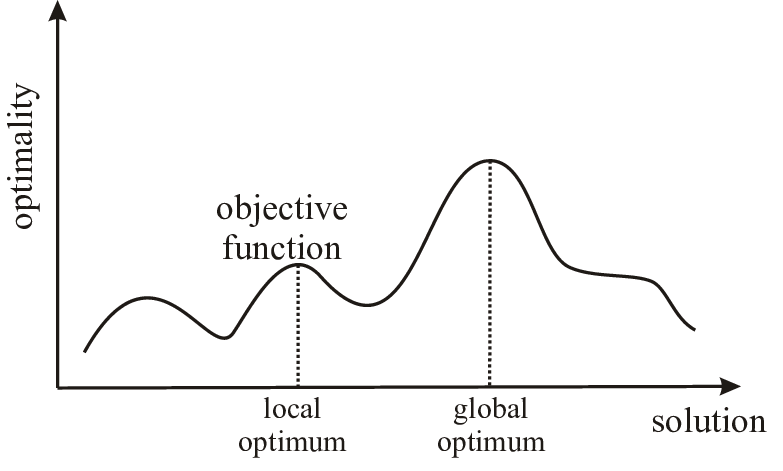

In [1]:
#hide_input
from IPython.display import Image
Image(filename='../assets/blogs/2021_12_22/local_search.png')

## Memory

In order to avoid the pitfall of local optima, Tabu Search incorporates two different memory structures. Short-term memory is based on the recency of occurrence to avoid previously visited solutions. This short-term structure could also be used to tabulate viable solutions and *intensify* the search at these solutions. Long-term memory is based on the frequency of occurrence starting from the beginning of the optimization. By keeping track of frequently visited solutions, it can *diversify* the search space by avoiding frequently visited solutions.

The short-term memory component is formerly known as the Tabu List or **intensification**. This structure stores a fixed and limited number of solutions for a number of iterations ($T$ also known as the Tabu Tenure). 

The long-term memory component stores the frequency of occurrence and is also referred to as **diversification**. Although Tabu Lists are useful locally optimize the best known solution, it may be too local in its approach and miss good unexplored solutions. Diversification overcomes this problem through two main approaches:
- **Restart Diversification:** Restart search space at unexplored solutions
- **Continuous Diversification:** Penalizing the objective function through a *frequency-memory* term of the current solution

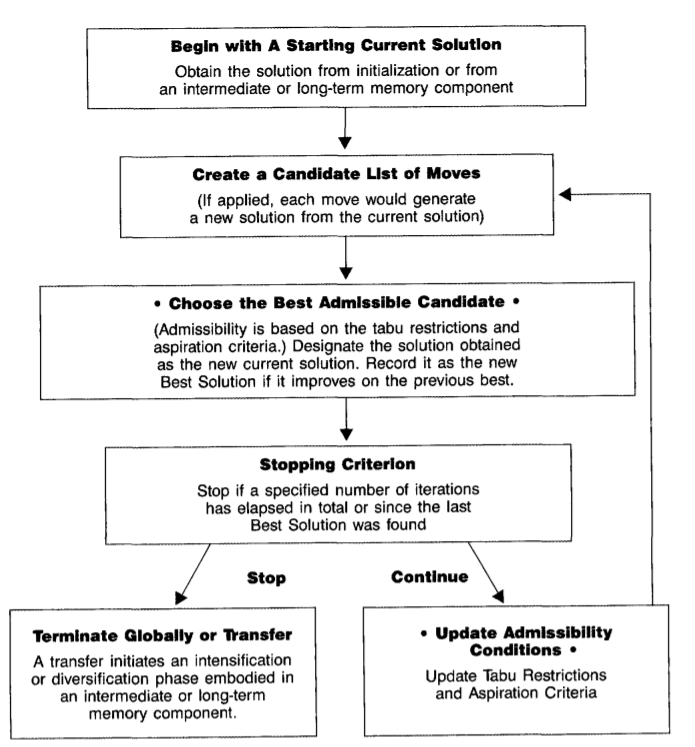

In [2]:
#hide_input
from IPython.display import Image
Image(filename='../assets/blogs/2021_12_22/tabu_search_short_term_memory.png')

## Aspiration Criteria

An optional component of Tabu Search is the use of an Aspiration Criteria. This allows a move to be made even if it's in the Tabu List which helps prevent stagnation. Common example of Aspiration Criteria include:
- if the move yields a better solution than any solution obtained so far
- if the move yields a better solution than an aspiration value (defined depending on optimization problem)
- if the direction of the search (improving or non-improving) does not change

## Termination Criteria

After completing an iteration cycle, the algorithm must check if any termination criteria has been met yet. These stopping conditions include:
- Evidence shows that the optimal solution has been found
- No feasible solutions in current neighbourhood generation
- Completed the maximum number of iterations
- An improved solution hasn't been found in a specified number of iterations

## Neighbourhood Generation

## Algorithm

1. Choose an initial solution $s$ in $X$ for the first iteration $k=1$
2. Generate neighbouring solutions $V^{*} \subseteq N(s,k) $ for the current solution $s$ and iteration $k$
3. Select the best solution $s'$ in our current neighbourhood $V^{*}$ that's not tabu $T(s)$ or that meets our aspiration criteria $A(s)$   
4. Update Tabu List $T(s)$ by removing each solution past the Tabu Tenure, incrementing each counter, and adding our current solution $s'$
5. If the termination criteria are met stop the search else continue from step 2 with our best neighbourhood solution $s'$

More formally we can describe the selection of the best solution $s'$ for iteration $k$ with the following set relation:

$s' \in N(s,k) = \{N(s,k) - T(s,k)\} + A(s,k)$

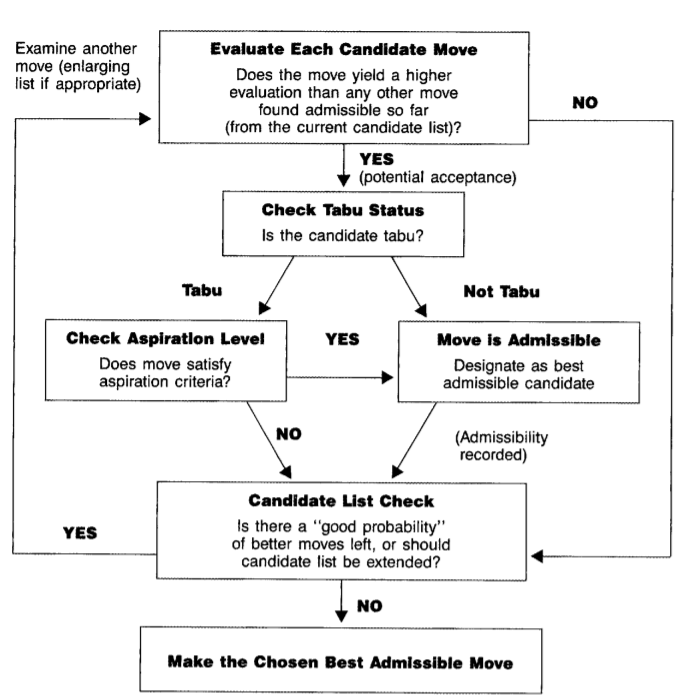

In [3]:
#hide_input
from IPython.display import Image
Image(filename='../assets/blogs/2021_12_22/tabu_search_diagram.png')

## Example

## Code

In [21]:
tabu_list = {'a': 2,
             'b': 3,
             'c': 8,
             'd': 1}
tabu_tenure = 8

for k,v in list(tabu_list.items()):
    tabu_list[k] += 1
    if tabu_list[k] >= tabu_tenure:
        del tabu_list[k]

tabu_list['gg'] = 1
'gg' not in tabu_list

False

In [26]:
def generate_first_solution():
    pass

def generate_neighbourhood():
    pass

def objective_function():
    pass

def check_termination_criteria():
    pass

neighbourhood_solution = generate_first_solution()

termination_criteria = False

k = 0 # iteration cycle

tabu_list = {neighbourhood_solution: 1}
tabu_tenure = 100 # CHANGE

best_solution = neighbourhood_solution
best_objective_fn = math.inf

while not termination_criteria:
    # update iteration
    k += 1
    
    # initialize best neighbouring objective value and generate neighbours
    neighbourhood_objective_fn = objective_function(neighbourhood_solution)
    neighbours = generate_neighbourhood(neighbourhood_solution)
    
    # iterate each neighbour
    for n in neighbours:
        current_objective_fn = objective_function(n)
        
        # find the best neighbour objective value that is not tabu
        # we're assuming we want to minimize the objective value in this scenario
        if (n not in tabu_list) and (current_objective_fn < neighbourhood_objective_fn):
            neighbourhood_objective_fn = current_objective_fn
            neighbourhood_solution = n

        # aspiration criteria (best solution obtained so far)
        if current_objective_fn < best_objective_fn:
            best_objective_fn = current_objective_fn
            best_solution = n
        
    # update tabu list
    for k,v in list(tabu_list.items()):
        tabu_list[k] += 1
        if tabu_list[k] >= tabu_tenure:
            del tabu_list[k]

    # add best neighbourhood solution to tabu list
    tabu_list[current_solution] = 1
    
    # check if termination criteria has been met yet
    if check_termination_criteria():
        termination_criteria = True

# References